# notebook small table
# *Panopea* transcriptome

In [1]:
from Bio import SeqIO, AlignIO
from Bio import SeqIO, SwissProt
from Bio.SeqUtils import GC, GC_skew
from Bio.SeqRecord import SeqRecord

from pandas import Series, DataFrame
import pandas as pd

import pylab
import matplotlib.pyplot as plt 

import numpy as np
from numpy import *

In [2]:
def columnas(file):
    m, m1 = 0,1
    for rowm in file:
        print ( "%2i %-16s" % (m1,rowm), end="\t")
        m+=1
        m1+=1
        if m==4:
            print("")
            m=0
    print()

In [ ]:
secuencias.to_csv("../panopea_data/data-results/Geoduck-transcriptome_v3_smalltable.csv",index=None)



In [5]:
secuencias = pd.read_csv("../panopea_data/data-results/Geoduck-transcriptome_v3_smalltable.csv")#, 
#index_col=None, delimiter=",", engine='python' )
#f5.read_csv("../panopea_data/data-results/Geoduck-transcriptome_v3_bigtablefinal.csv",index=None)
secuencias.head(2)


,ContigID,length,GC,CpG,male_unique,female_unique,sex,Evalue,UniProt_Acc,Protein names,...,Gigaton-ID,evalue-Ru,Ruphibase_ID,evalue-SIG,SigID,Cluster,Tissue-enriched-expression,sseqid3,Organism,GO
0,comp100029_c1_seq1,288,50.0000,0.669506,15,11,NaN,NaN,NaN,NaN,...,CHOYP_LOC412155.1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,comp100065_c0_seq1,201,50.2488,0.886765,1,10,NaN,2.000000e-08,Q5PRC1,Lipoma HMGIC fusion partner homolog,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LHFP_DANRE,Danio rerio (Zebrafish) (Brachydanio rerio),NaN


# Process to obtain data for drawing the Venn diagram 

In [17]:
lineaC =[] # data from blastx
lineaG =[] # data from Giga
lineaD =[] # data from Dh
lineaR =[] # data from Ruphibase
linea = ""
n=1

for row in secuencias.index:
    row2=secuencias.loc[row]

    if str(row2["UniProt_Acc"])=="nan" and str(row2["Gigaton-ID"])=="nan" and str(row2["Ruphibase_ID"])=="nan" and str(row2["SigID"])=="nan":
        continue
        
    else:        
        if str(row2["UniProt_Acc"]) !="nan":
            linea = 1
        else:
            linea = ""
        lineaC.append(linea)
        if str(row2["Gigaton-ID"]) !="nan":
            linea = 1
        else:
            linea = ""
        lineaG.append(linea)

        if str(row2["Ruphibase_ID"]) !="nan":
            linea = 1
        else:
            linea = ""
        lineaR.append(linea)

        if str(row2["SigID"]) !="nan":
            linea = 1
        else:
            linea = ""
        lineaD.append(linea)

        n+=1
        #if n==1000:
        #    break

len(lineaC), len(lineaG), len(lineaD), len(lineaR)

(25963, 25963, 25963, 25963)

In [7]:
expressiondata = {'Blastx': lineaC,
                  'Giga-Ton': lineaG, 
                  'Rb': lineaR, 
                  "Dh": lineaD}
expression = DataFrame(expressiondata)
expression.describe()

,Blastx,Dh,Giga-Ton,Rb
count,25963,25963,25963,25963
unique,2,2,2,2
top,1,,,
freq,22974,25802,14140,23104


In [8]:
expression.head()

,Blastx,Dh,Giga-Ton,Rb
0,,,1,
1,1,,,
2,1,,,
3,,,1,
4,1,,1,


In [9]:
expression.to_csv("../panopea_data/data-results/Geoduck-transcriptome_v3_venndata4.csv",index=None)



## run in R (R-studio)

## Four databases
```
library(VennDiagram)
set <- 
read.csv("/Users/migueldelrio/Desktop/panopea/panopea_data/data-results/Geoduck-transcriptome_v3_venndata4.csv")
str(set)

grid.newpage()
venn.plot <- draw.quad.venn(area1 = nrow(subset(set, Blastx==1)), area2 = nrow(subset(set, Giga.Ton==1)), 
                            area3 = nrow(subset(set, Rb==1)), area4 =nrow(subset(set, Dh==1)), 
                            n12 = nrow(subset(set, Blastx==1 & Giga.Ton==1)), 
                            n13 = nrow(subset(set, Blastx==1 & Rb==1)), 
                            n14 = nrow(subset(set, Blastx==1 & Dh==1)), 
                            n23 = nrow(subset(set, Giga.Ton==1 & Rb==1)), 
                            n24 = nrow(subset(set, Giga.Ton==1 & Dh==1)), 
                            n34 = nrow(subset(set, Rb==1 & Dh==1)), 
                            n123 = nrow(subset(set, Blastx==1 & Giga.Ton==1 & Rb==1)), 
                            n134 = nrow(subset(set, Blastx==1 & Dh==1 & Rb==1)), 
                            n124 = nrow(subset(set, Blastx==1 & Giga.Ton==1 & Dh==1)), 
                            n234 = nrow(subset(set, Giga.Ton==1 & Rb==1 & Dh==1)), 
                            n1234= nrow(subset(set, Blastx==1 & Giga.Ton==1 & Rb==1 & Dh==1)), 
                            category = c("Uniprot/Swiss", "GigaTon", "Ruphibase", "Dh"), lty = "blank", 
                            fill = c("skyblue", "pink1", "mediumorchid", "orange"))

pdf("/Users/migueldelrio/Desktop/panopea/img/Panopea_venn4.pdf")
grid.draw(venn.plot)
dev.off()

png("/Users/migueldelrio/Desktop/panopea/img/Panopea_venn4.png")
grid.draw(venn.plot)
dev.off()

```


### Result is 

<img src= "../img/Panopea_venn4.png">

In [41]:
![venn]<https://github.com/sr320/paper-pano-go/blob/master/manuscript/figures/Panopea_venn4.png>

/bin/sh: -c: line 0: syntax error near unexpected token `newline'
/bin/sh: -c: line 0: `[venn]<https://github.com/sr320/paper-pano-go/blob/master/manuscript/figures/Panopea_venn4.png>'


In [ ]:
https://github.com/sr320/paper-pano-go/blob/master/manuscript/figures/Panopea_venn4.png

## in case of comparing three columns the diagram can be obtained as follows

## Three databases
```
library(VennDiagram)
set <- 
read.csv("/Users/migueldelrio/Desktop/panopea/panopea_data/data-results/Geoduck-transcriptome_v3_venndata4.csv")
str(set)

grid.newpage()
venn.plot <-draw.triple.venn(area1 = nrow(subset(set, Blastx==1)), area2 = nrow(subset(set, Giga.Ton==1)),
                 area3 = nrow(subset(set, Rb==1)), 
                 n12 = nrow(subset(set, Blastx==1 & Giga.Ton==1)), 
                 n13 = nrow(subset(set, Blastx==1 & Rb==1)), 
                 n23 = nrow(subset(set, Giga.Ton==1 & Rb==1)), 
                 n123 = nrow(subset(set, Blastx==1 & Giga.Ton==1 & Rb==1)), 
                 category = c("Uniprot/Swiss", "GigaTon", "Ruphibase"), lty = "blank", 
                 fill = c("skyblue", "pink1", "mediumorchid"))
# saving as png file
png("/Users/migueldelrio/Desktop/panopea/img/Panopea_venn3.png")
grid.draw(venn.plot)
dev.off()
# saving as pdf file
pdf("/Users/migueldelrio/Desktop/panopea/img/Panopea_venn3.pdf")
grid.draw(venn.plot)
dev.off()
```


<img src= "../img/Panopea_venn3.png">

In [10]:
from matplotlib_venn import venn3_unweighted, venn2_unweighted

In [11]:
# para que aparezcan las graficas en la bitacora
%matplotlib inline

## python uses different data coding than R

In [23]:
lineaC =[] # data from blastx
lineaG =[] # data from Giga
lineaD =[] # data from Dh
lineaR =[] # data from Ruphibase
linea = ""
n=1

#for row in f5.index:
#    row2=f5.loc[row]
for row in secuencias.index:
    row2=secuencias.loc[row]


    if str(row2["UniProt_Acc"])=="nan" and str(row2["Gigaton-ID"])=="nan" and str(row2["Ruphibase_ID"])=="nan" and str(row2["SigID"])=="nan":
        continue
        
    else:        
        if str(row2["UniProt_Acc"]) !="nan":
            linea = row2["ContigID"]
        else:
            linea = ""
        lineaC.append(linea)
        if str(row2["Gigaton-ID"]) !="nan":
            linea = row2["ContigID"]
        else:
            linea = ""
        lineaG.append(linea)

        if str(row2["Ruphibase_ID"]) !="nan":
            linea = row2["ContigID"]
        else:
            linea = ""
        lineaR.append(linea)

        if str(row2["SigID"]) !="nan":
            linea = row2["ContigID"]
        else:
            linea = ""
        lineaD.append(linea)

        n+=1
        #if n==1000:
        #    break

len(lineaC), len(lineaG), len(lineaD), len(lineaR)

(25963, 25963, 25963, 25963)

In [30]:
lineaC = set(lineaC)
lineaG = set(lineaG)
lineaR = set(lineaR)
lineaD = set(lineaD)

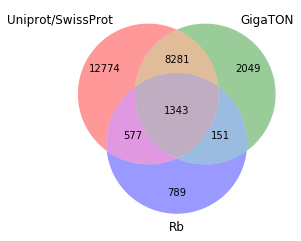

In [31]:
venn3_unweighted([lineaC, lineaG, lineaR], ('Uniprot/SwissProt', 'GigaTON', 'Rb'))
plt.show()

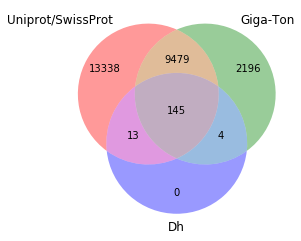

In [32]:
venn3_unweighted([lineaC, lineaG, lineaD], ('Uniprot/SwissProt', 'Giga-Ton', 'Dh'))
plt.show()

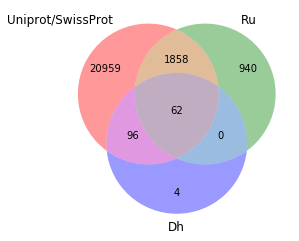

In [33]:
venn3_unweighted([lineaC, lineaR, lineaD], ('Uniprot/SwissProt', 'Ru', 'Dh'))
plt.show()

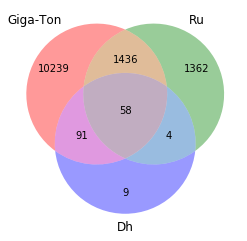

In [34]:
venn3_unweighted([lineaG, lineaR, lineaD], ('Giga-Ton', 'Ru', "Dh"))
plt.show()

## Other diagrams

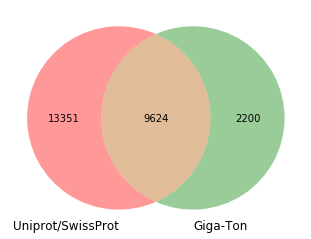

In [35]:
venn2_unweighted([lineaC, lineaG], ('Uniprot/SwissProt', 'Giga-Ton'))
plt.show()

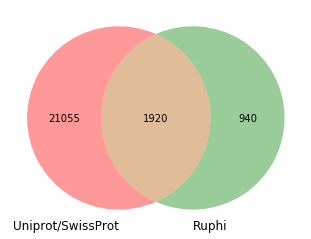

In [36]:
venn2_unweighted([lineaC, lineaR], ('Uniprot/SwissProt', 'Ruphi'))
plt.show()

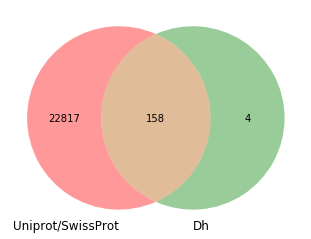

In [37]:
venn2_unweighted([lineaC, lineaD], ('Uniprot/SwissProt', 'Dh'))
plt.show()